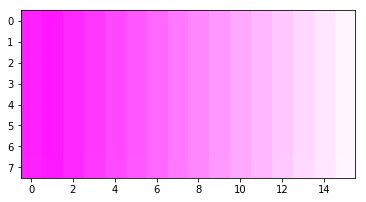

In [7]:
import numpy as np
import skimage.io
import os
import random
from matplotlib import pylab
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

filename = 'C:/Users/Ashley/Documents/GitHub/image-rgb-in-3D/gradientbox.png'
img = skimage.io.imread( filename )
plt.imshow(img)

height, width, depth = img.shape
# print(img.shape)
# np.meshgrid( width, height )
# print(np.meshgrid(width, height))
# imageArray = np.append( np.meshgrid( width, height ), img )
# print(imageArray)


heightAr = list(range(0, height))
# print(heightAr)
widthAr = list(range(0, width))
# print(widthAr)
meshGrid = np.meshgrid(widthAr, heightAr)
imageArray = np.concatenate((meshGrid[0][:, :, None], meshGrid[1][:, :, None], img), axis = 2)
# print(imageArray[0, 2])
# print(imageArray.shape)

# reshaped is the input for the plane-fitting
reshaped = imageArray.reshape(width * height, -1)
# print(reshaped)

# prints out the channel that is wanted with the xy coordinates
def getChannel(imageArray, channel):
    xyc = [0, 1, channel]
    return imageArray[:, xyc]

# channel constants
r = 0
g = 1
b = 2
a = 3

In [42]:
# create empty 3D array for A, B, C
# ABC = np.zeros([3, 3, 3]) # probably need to change the size
# print(ABC)


# f(x,y) = Ax + By + C
#xyc is a pixel with xy coordinates and one channel (r, g, b, or a)
# used for finding the error of the individual point/channel
def checkPlane(xyc, model): # [x, y, c] 
#     f(x,y) = Ax + By + C = [x1, y1, 1] * [A, B, C]T
    p = [xyc[0], xyc[1], 1]
#     unk = numpy.array([A, B, C])
    return xyc[2] - numpy.dot(p, model.transpose()) # c - Ax + By + C

def getPoints(xyc):
    # iterate through the picture
    for r in range(0, width):
        for c in range(0, height):
            neighbors = []
#             neighbors(1) = img(r-1,c-1); % Upper left.  r = row, c = column.
#             neighbors(2) = img(r-1,c); % Upper middle.  r = row, c = column.
#             neighbors(3) = img(r-1,c+1); % Upper right.  r = row, c = column.
#             neighbors(4) = img(r,c-1); % left.  r = row, c = column.
#             neighbors(5) = img(r,c+1); % right. r = row, c = column.
#             neighbors(6) = img(r+1,c+1); % Lowerleft.  r = row, c = column.
#             neighbors(7) = img(r+1,c); % lower middle.  r = row, c = column.
#             neighbors(8) = img(r+1,c-1); % Lower left.  r = row, c = column.
#             print(xyc[x, y])
#             checkPlane(xyc[x, y], [0, 0, 0])
        
        
        
##### found at https://alyssaq.github.io/2014/understanding-hough-transform/ #####
# find the A, B, C variables that the point finds based on its neighbors
def hough_line(img):
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0))
    width, height = img.shape
    diag_len = np.ceil(np.sqrt(width * width + height * height))   # max_dist
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2.0)

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint64)
    y_idxs, x_idxs = np.nonzero(img)  # (row, col) indexes to edges

    # Vote in the hough accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

    for t_idx in range(num_thetas):
        # Calculate rho. diag_len is added for a positive index
        rho = round(x * cos_t[t_idx] + y * sin_t[t_idx]) + diag_len
        accumulator[rho, t_idx] += 1
    
    return accumulator, thetas, rhos

# Notes: 
# Given: pixel values of xyrgba for image
# find plane formula by looking at neighbors' xyrgba values (one channel at a time?)
# ways to solve for plane formula:
# Three points (A, B, C) define two vectors AB and AC
# find the cross product of the two vectors

# votes are in ABC space

# with three xyc points, find the normal vector by 
    # import numpy as np
    # p1 = np.array([1, 2, 3])
    # p2 = np.array([4, 6, 9])
    # p3 = np.array([12, 11, 9]) ###### 3 points with xyc ######

    # # These two vectors are in the plane
    # v1 = p3 - p1
    # v2 = p2 - p1

    # # the cross product is a vector normal to the plane
    # cp = np.cross(v1, v2)
    # a, b, c = cp

    # # This evaluates a * x3 + b * y3 + c * z3 which equals d
    # d = np.dot(cp, p3)

    # print('The equation is {0}x + {1}y + {2}z = {3}'.format(a, b, c, d))

In [43]:
# int index = 0
# Vector3[] normals //(x,y,(r,g,b,a)) 
normalsXYR = []
normalsXYG = []
normalsXYB = []
normalsXYA = []

# normalsXY = [normalsXY, enum {r,g,b,a}]


# Path[] perimeters

# def Vote(int x, int y)
#     var pix = pixel(x,y)
#     for all (colors in pixel)
#         bool boundary = false;
#         var perimeter = newPerimeter(pix)
#         //Do some math logic to calculate normal
#         while(!boundary)
#             perimeter.growPerimeter(pix)
#             if(//perimeter out of range)
#                 boundary = true
#         Vector3 normal = getNormal(perimeter)
#         normals[index + color] = normal + color;
#         perimeters[index] = perimeter
        
# for all (x in width)
#     for all (y in height)
#         Vote(x,y)
#         index++        

In [44]:
x = 10
y = 6
print(height, width)
getChannel(reshaped, g).index(x)
# getChannel(reshaped, g)[x]

8 16


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [40]:

# TODO: get neighbors (incl. center pix) function
# Fit plane on neighbors
# Calculate error of plane fit
# do all of this for the individual color channels

# https://stackoverflow.com/questions/12299540/plane-fitting-to-4-or-more-xyz-points
from scipy.optimize import leastsq

def GetNeighbors(x, y, c, img, width, length):
    
    neighbors = []
    
    N_Edge = (y == 0)
    E_Edge = (x == width-1)
    S_Edge = (y == length-1)
    W_Edge = (x == 0)
    
    n = (y-1) 
    e = (x+1)
    s = (y+1)
    w = (x-1)

    xyc = img[x][y][c]
    xnc = img[x][n][c]
    enc = img[e][n][c]
    eyc = img[e][y][c]
    esc = img[e][s][c]
    xsc = img[x][s][c]
    wsc = img[w][s][c]
    wyc = img[w][y][c]
    wnc = img[w][n][c]
    
    self = [x, y, xyc]
    N = [x, n, xnc]
    NE = [e, n, enc]
    E = [e, y, eyc]
    SE = [e, s, esc]
    S = [x, s, xsc]
    SW = [w, s, wsc]
    W = [w, y, wyc]
    NW = [w, n, wnc]
    
    perimeter = [self, N, NE, E, SE, S, SW, W, NW]
    
    for p in perimeter:
        if(p[2] != None):
#             neighbors.Add(p)
            neighbors.append(p)
#         else
#             perimeter[p.index]
            
    return neighbors

# def OldNeighbors(x, y, c, img, width, length):
#     edge = False;
#     corner = False;
    
#     N_Edge = (y == 0)
#     E_Edge = (x == width-1)
#     S_Edge = (y == length-1)
#     W_Edge = (x == 0)
    
#     n = (y-1) 
#     e = (x+1)
#     s = (y+1)
#     w = (x-1)
    
# #     if(N_Edge || E_Edge || S_Edge || W_Edge):
# #         #code
# #         return;
# #     else:
#     self = [x, y, img[x][y][c]]
#     N = [x, n, img[x][n][c]]
#     NE = [e, n, img[e][n][c]]
#     E = [e, y, img[e][y][c]]
#     SE = [e, s, img[e][s][c]]
#     S = [x, s, img[x][s][c]]
#     SW = [w, s, img[w][s][c]]
#     W = [w, y, img[w][y][c]]
#     NW = [w, n, img[w][n][c]]
#     neighbors = [self, N, NE, E, SE, S, SW, W, NW]
#     return neighbors
    
    
#     if((x == 0 && y ==0) || (x == width-1 && y == length-1))
#         corner = true;
#         if(x == 0 && y ==0)
        
#         else if(x == width-1 && y == length-1)
#     else if((x == 0) || (x == width-1))
    
#     else if((y == 0) || (y == length-1))
        
#     else
#         N = x, y-1, img[x][y-1]
#         NE = x+1, y-1, img[x+1][y-1]
#         E = x+1, y, img[x+1][y]
#         SE = x+1, y+1, img[x+1][y+1]
#         S = x, y+1, img[x][y+1]
#         SW = x-1, y+2, img[x-1][y+1]
#         W = x-1, y, img[x-1][y]
#         NW = x-1, y+1, img[x-1][y+1]    
#     var neighbors = N, NE, E, SE, S, SW, W, NW
#     return neighbors

def f_min(X,p):
    plane_xyz = p[0:3]
    distance = np.dot(plane_xyz, X.T).sum(axis=0) + p[3]
#     distance = np.dot(plane_xyz, X.T).sum(axis=1) + p[3]
    return distance / np.linalg.norm(plane_xyz)

def residuals(params, signal, X):
    return f_min(X, params)

def PlaneFit(neighbors):
    # neighbors in format xyc
    XYC = np.array(neighbors)
    p0 = [0.506645455682, -0.185724560275, -1.43998120646, 1.37626378129]

    sol = leastsq(residuals, p0, args=(None, XYC))[0]
#     print('The equation is {0}x + {1}y + {2}z = 0'.format(sol))
    print("Solution: ", sol)
    print("Old Error: ", (f_min(XYC, p0)**2).sum())
    print("New Error: ", (f_min(XYC, sol)**2).sum())

    
PlaneFit([
        [1, -1, -1, 0],
        [-1, -1, 0, 1],
        [255, 255, 254, 2]])

# def Vote(int x, int y)
#     pixel = ar[x][y]
#     for c in pixel:
#         bool boundary = false;
#         var perimeter = newPerimeter(pix)
# #         Do some math logic to calculate normal
#         while(!boundary)
#             perimeter.growPerimeter(pix)
#             if(//perimeter out of range)
#                 boundary = true
#         Vector3 normal = getNormal(perimeter)
#         normals[index + color] = normal + color;
#         perimeters[index] = perimeter


# ar = np.array(img)
# redCh = []
# greenCh = []
# blueCh = []
# # ar[1][3]
# for x in range(width):
#     for y in range(height):
#         pixel = ar[x][y]
#         for c in range(0, pixel.length):
#             calculatePlane(x,y,c,ar)
# #         Vote(x, y)
#         print(pixel)


ValueError: shapes (3,) and (4,3) not aligned: 3 (dim 0) != 4 (dim 0)

In [41]:
def PrintNeighbors(n):
    print("Channel:", i)
    print("------------")
    for p in n:
        print(p)
    print("\n")
    

for i in range(0,3):
    n = GetNeighbors(1, 1, i, img, width, height)
    PlaneFit(n)
    PrintNeighbors(n)


TypeError: Improper input: N=4 must not exceed M=1

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fitFunc(x, a, b, c, d):
    return a + b*x[0] + c*x[1] + d*x[0]*x[1]

x_3d = np.array([[1,2,3,4,6],[4,5,6,7,8]])

p0 = [5.11, 3.9, 5.3, 2]

fitParams, fitCovariances = curve_fit(fitFunc, x_3d, x_3d[1,:], p0)
print(' fit coefficients:\n', fitParams)

 fit coefficients:
 [ 6.48425001e-08 -1.43334086e-07  1.00000002e+00  1.37584829e-08]
